In [1]:
import os
import torch.nn as nn
import torch
import torch.nn.functional as F
from torch.optim import SGD, Adam
from torch.utils.data import DataLoader, random_split
from torch.optim.lr_scheduler import CyclicLR, LambdaLR
import torch.multiprocessing as mp
import numpy as np
import random
import math

import sys
sys.path.append("..") # adds higher directory to python modules path

from LoaderPACK.Unet import Unet
from LoaderPACK.Unet_leaky import Unet_leaky, Unet_leaky_lstm

In [2]:
nEpoch = 5
base_lr = 0.1 # where we start the learning rate

device = "cpu"

model = Unet(n_channels=1, n_classes=10).to(device)
# model = Unet_leaky(n_channels=1, n_classes=2).to(device)
optimizer = SGD(model.parameters(), lr=base_lr)
lossFunc = nn.CrossEntropyLoss(weight = (torch.zeros(10)+1).to(device), reduction = "mean")
# lossFunc = nn.MSELoss()
fl = torch.FloatTensor
it = torch.LongTensor
l = 60000

In [3]:
lss = []
for i in range(100):
    ind = torch.randint(10, (1, 1, l))/10 # use random values
    # ind = torch.randn(1, 1, l)
    # tar = torch.zeros(1, 1, l) + 1
    tar = (ind*10).type(it)
    target = tar.view(-1).type(it)
    y_pred = model(ind)
    model.zero_grad()
    optimizer.zero_grad()
    pred = y_pred.transpose(1, 2).reshape(-1, 10).type(fl)
    loss = lossFunc(pred, target)
    # loss = lossFunc(torch.nn.functional.one_hot(tar.to(torch.int64)[0][0], 10).to(torch.float32), pred)
    loss.backward()
    lss.append(loss.item())
    # nn.utils.clip_grad_value_(model.parameters(), clip_value=1.0)
    # nn.utils.clip_grad_norm_(model.parameters(), max_norm=10.0, norm_type=2)
    optimizer.step()

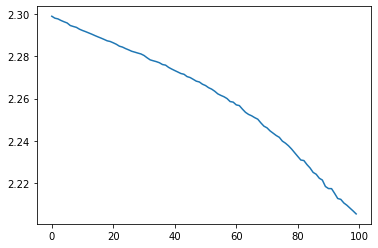

In [4]:
import matplotlib.pyplot as plt
plt.plot(lss)
plt.show()

In [5]:
ind = torch.zeros(1, 1, l) + torch.randint(10, (1,))/10
# ind = torch.randn(1, 1, l)
# tar = torch.zeros(1, 1, l) + 1
tar = (ind*10).type(it)
# target = tar.view(-1).type(it)
y_pred = model(ind)

In [6]:
y_pred[0][:,50]

tensor([0.0851, 0.0936, 0.1151, 0.1172, 0.1021, 0.0766, 0.1102, 0.1000, 0.1121,
        0.0881], grad_fn=<SelectBackward0>)

In [7]:
ind

tensor([[[0.4000, 0.4000, 0.4000,  ..., 0.4000, 0.4000, 0.4000]]])

In [8]:
nEpoch = 5
base_lr = 0.1 # where we start the learning rate

device = "cpu"

model = Unet(n_channels=1, n_classes=10).to(device)
# model = Unet_leaky(n_channels=1, n_classes=2).to(device)
optimizer = SGD(model.parameters(), lr=base_lr)
lossFunc = nn.CrossEntropyLoss(weight = (torch.zeros(10)+1).to(device), reduction = "mean")
# lossFunc = nn.MSELoss()
fl = torch.FloatTensor
it = torch.LongTensor
l = 60000

In [9]:
lss = []
for i in range(100):
    ind = torch.zeros(1, 1, l) + torch.randint(10, (1,))/10
    tar = (ind*10).type(it)
    target = tar.view(-1).type(it)
    y_pred = model(ind)
    model.zero_grad()
    optimizer.zero_grad()
    pred = y_pred.transpose(1, 2).reshape(-1, 10).type(fl)
    loss = lossFunc(pred, target)
    # loss = lossFunc(torch.nn.functional.one_hot(tar.to(torch.int64)[0][0], 10).to(torch.float32), pred)
    loss.backward()
    lss.append(loss.item())
    # nn.utils.clip_grad_value_(model.parameters(), clip_value=1.0)
    # nn.utils.clip_grad_norm_(model.parameters(), max_norm=10.0, norm_type=2)
    optimizer.step()

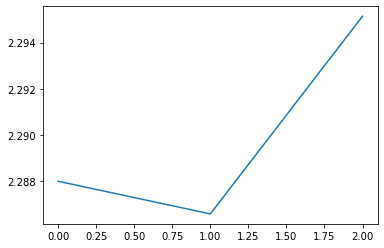

In [10]:
import matplotlib.pyplot as plt
plt.plot(lss)
plt.show()

In [11]:
print(lss)

[2.287996768951416, 2.2865841388702393, 2.2951395511627197, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [12]:
nEpoch = 5
base_lr = 0.1 # where we start the learning rate

device = "cpu"

model = Unet(n_channels=1, n_classes=10).to(device)
# model = Unet_leaky(n_channels=1, n_classes=2).to(device)
optimizer = SGD(model.parameters(), lr=base_lr)
lossFunc = nn.CrossEntropyLoss(weight = (torch.zeros(10)+1).to(device), reduction = "mean")
# lossFunc = nn.MSELoss()
fl = torch.FloatTensor
it = torch.LongTensor
l = 60000

In [13]:
lss = []
for i in range(100):
    ind = torch.zeros(1, 1, l) + torch.randint(10, (1,))/10
    tar = (ind*10).type(it)
    target = tar.view(-1).type(it)
    y_pred = model(ind)
    model.zero_grad()
    optimizer.zero_grad()
    pred = y_pred.transpose(1, 2).reshape(-1, 10).type(fl)
    loss = lossFunc(pred, target)
    # loss = lossFunc(torch.nn.functional.one_hot(tar.to(torch.int64)[0][0], 10).to(torch.float32), pred)
    loss.backward()
    lss.append(loss.item())
    nn.utils.clip_grad_value_(model.parameters(), clip_value=1.0)
    # nn.utils.clip_grad_norm_(model.parameters(), max_norm=10.0, norm_type=2)
    optimizer.step()

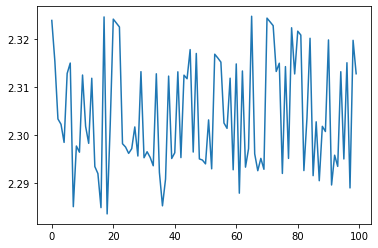

In [14]:
import matplotlib.pyplot as plt
plt.plot(lss)
plt.show()

# 4 Train the network with constant value

In [25]:
nEpoch = 5
base_lr = 0.1 # where we start the learning rate

device = "cpu"

model = Unet(n_channels=1, n_classes=10).to(device)
# model = Unet_leaky(n_channels=1, n_classes=2).to(device)
optimizer = SGD(model.parameters(), lr=base_lr)
lossFunc = nn.CrossEntropyLoss(weight = (torch.zeros(10)+1).to(device), reduction = "mean")
# lossFunc = nn.MSELoss()
fl = torch.FloatTensor
it = torch.LongTensor
l = 60000

In [26]:
lss = []
for i in range(100):
    ind = torch.zeros(1, 1, l) + torch.randint(10, (1,))/10
    tar = torch.zeros(1, 1, l) + 1
    target = tar.view(-1).type(it)
    y_pred = model(ind)
    model.zero_grad()
    optimizer.zero_grad()
    pred = y_pred.transpose(1, 2).reshape(-1, 10).type(fl)
    loss = lossFunc(pred, target)
    # loss = lossFunc(torch.nn.functional.one_hot(tar.to(torch.int64)[0][0], 10).to(torch.float32), pred)
    loss.backward()
    lss.append(loss.item())
    nn.utils.clip_grad_value_(model.parameters(), clip_value=1.0)
    # nn.utils.clip_grad_norm_(model.parameters(), max_norm=10.0, norm_type=2)
    optimizer.step()

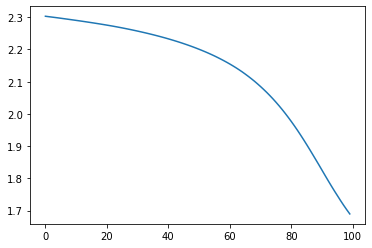

In [27]:
import matplotlib.pyplot as plt
plt.plot(lss)
plt.show()

In [29]:
print(lss)

[2.3030896186828613, 2.301814317703247, 2.3006017208099365, 2.29939603805542, 2.2981646060943604, 2.2968666553497314, 2.2955455780029297, 2.294238567352295, 2.292915105819702, 2.2915782928466797, 2.2902348041534424, 2.2888717651367188, 2.287487268447876, 2.286076068878174, 2.2846312522888184, 2.2831826210021973, 2.281717538833618, 2.2802112102508545, 2.2786788940429688, 2.2771191596984863, 2.2755253314971924, 2.2738969326019287, 2.2722270488739014, 2.270472764968872, 2.268688917160034, 2.266861915588379, 2.264957904815674, 2.2630300521850586, 2.261052370071411, 2.2590277194976807, 2.2569408416748047, 2.2548203468322754, 2.2526230812072754, 2.2504003047943115, 2.2480807304382324, 2.2457363605499268, 2.2432892322540283, 2.240797996520996, 2.2382397651672363, 2.2356112003326416, 2.232861280441284, 2.2300679683685303, 2.227173328399658, 2.224214792251587, 2.221163034439087, 2.2179672718048096, 2.2147057056427, 2.211341619491577, 2.2078492641448975, 2.2042388916015625, 2.20050048828125, 2.1